In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [173]:
df = pd.read_csv("datasets/emissions.csv")

In [174]:
df

,year,state-name,sector-name,fuel-name,value
0,1970,Alabama,Industrial carbon dioxide emissions,Coal,26.721507
1,1970,Alabama,Industrial carbon dioxide emissions,Petroleum,3.577779
2,1970,Alabama,Industrial carbon dioxide emissions,Natural Gas,8.944097
3,1970,Alabama,Industrial carbon dioxide emissions,All Fuels,39.243383
4,1970,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,102.646851
...,...,...,...,...,...
59896,2021,Wyoming,Commercial carbon dioxide emissions,Coal,0.012374
59897,2021,Wyoming,Residential carbon dioxide emissions,All Fuels,0.937989
59898,2021,Wyoming,Residential carbon dioxide emissions,Natural Gas,0.717777
59899,2021,Wyoming,Residential carbon dioxide emissions,Petroleum,0.220212


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59901 entries, 0 to 59900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         59901 non-null  int64  
 1   state-name   59901 non-null  object 
 2   sector-name  59901 non-null  object 
 3   fuel-name    59901 non-null  object 
 4   value        59901 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


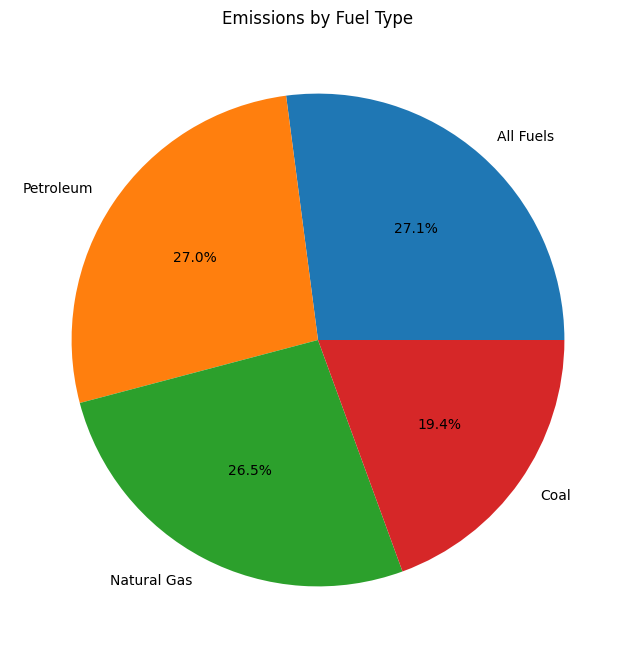

In [176]:
plt.figure(figsize=(8, 8))
plt.pie(df["fuel-name"].value_counts(), labels=df["fuel-name"].value_counts().index, autopct='%1.1f%%')
plt.title('Emissions by Fuel Type')
plt.show()

In [177]:
df["sector-name"].unique()

array(['Industrial carbon dioxide emissions',
       'Total carbon dioxide emissions from all sectors',
       'Residential carbon dioxide emissions',
       'Commercial carbon dioxide emissions',
       'Transportation carbon dioxide emissions',
       'Electric Power carbon dioxide emissions'], dtype=object)

In [178]:
df["state-name"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'United States', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [179]:
df["fuel-name"].unique()

array(['Coal', 'Petroleum', 'Natural Gas', 'All Fuels'], dtype=object)

In [180]:
colors = {'Coal': 'r', 'Petroleum': 'b', 'Natural Gas': 'g', 'All Fuels': 'darkblue'}

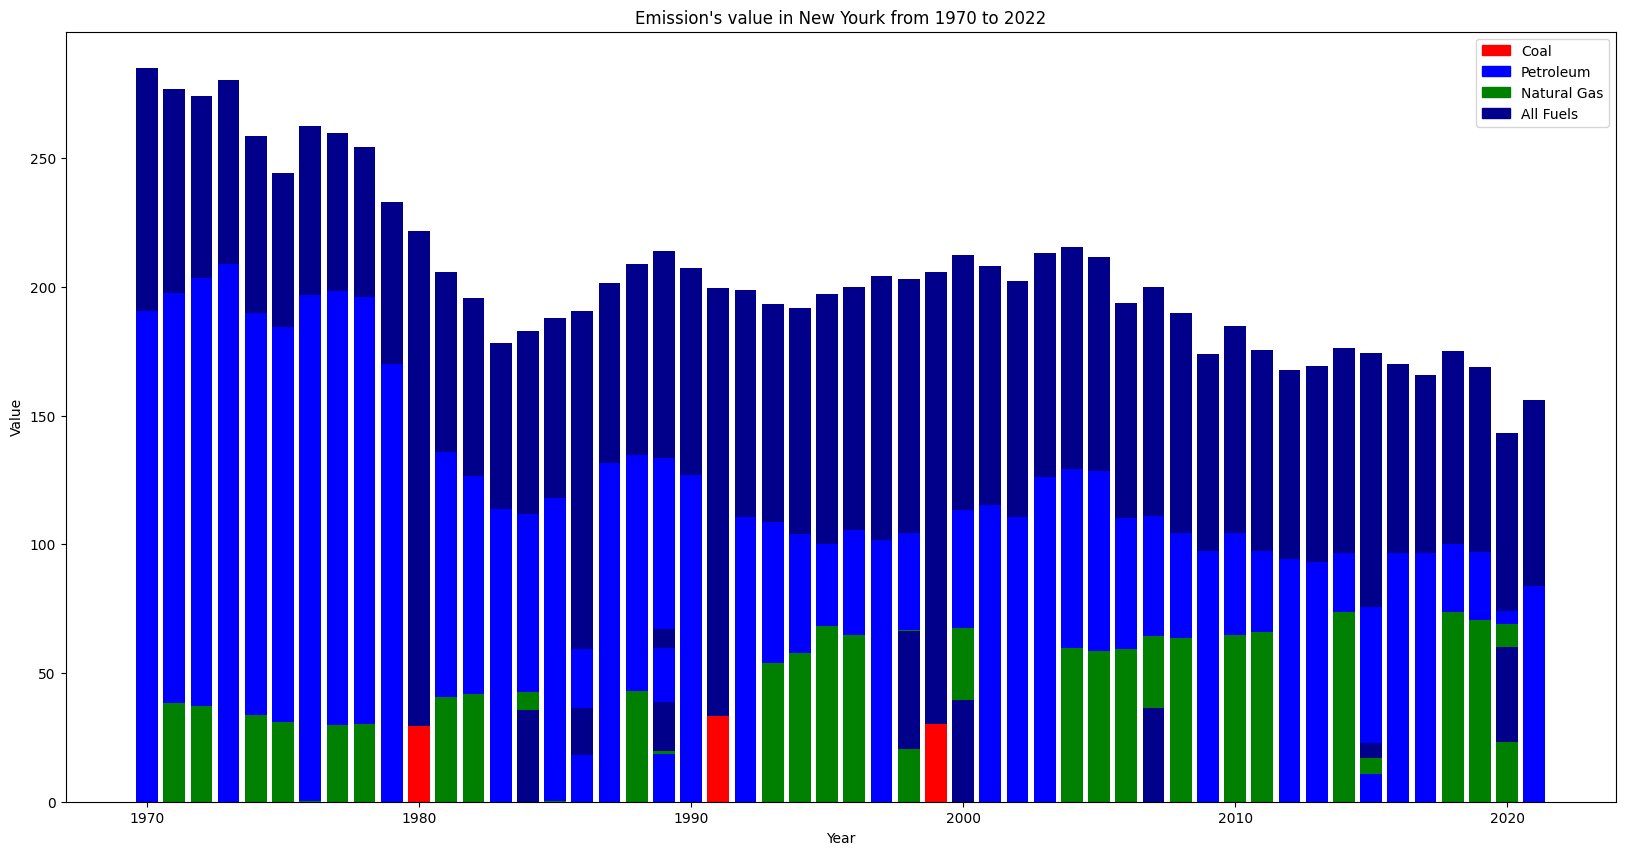

In [181]:
plt.figure(figsize=(20, 10))
ny_data = df[df["state-name"] == 'New York']
plt.bar(ny_data["year"], ny_data["value"], color=[colors[fuel] for fuel in ny_data["fuel-name"]])
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Emission's value in New Yourk from 1970 to 2022")
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
plt.legend(legend_handles, colors.keys())

In [196]:
data = df[(df["value"] > 250) & (df["state-name"] != "United States")]

Text(0.5, 1.0, "The most state's emissions by value")

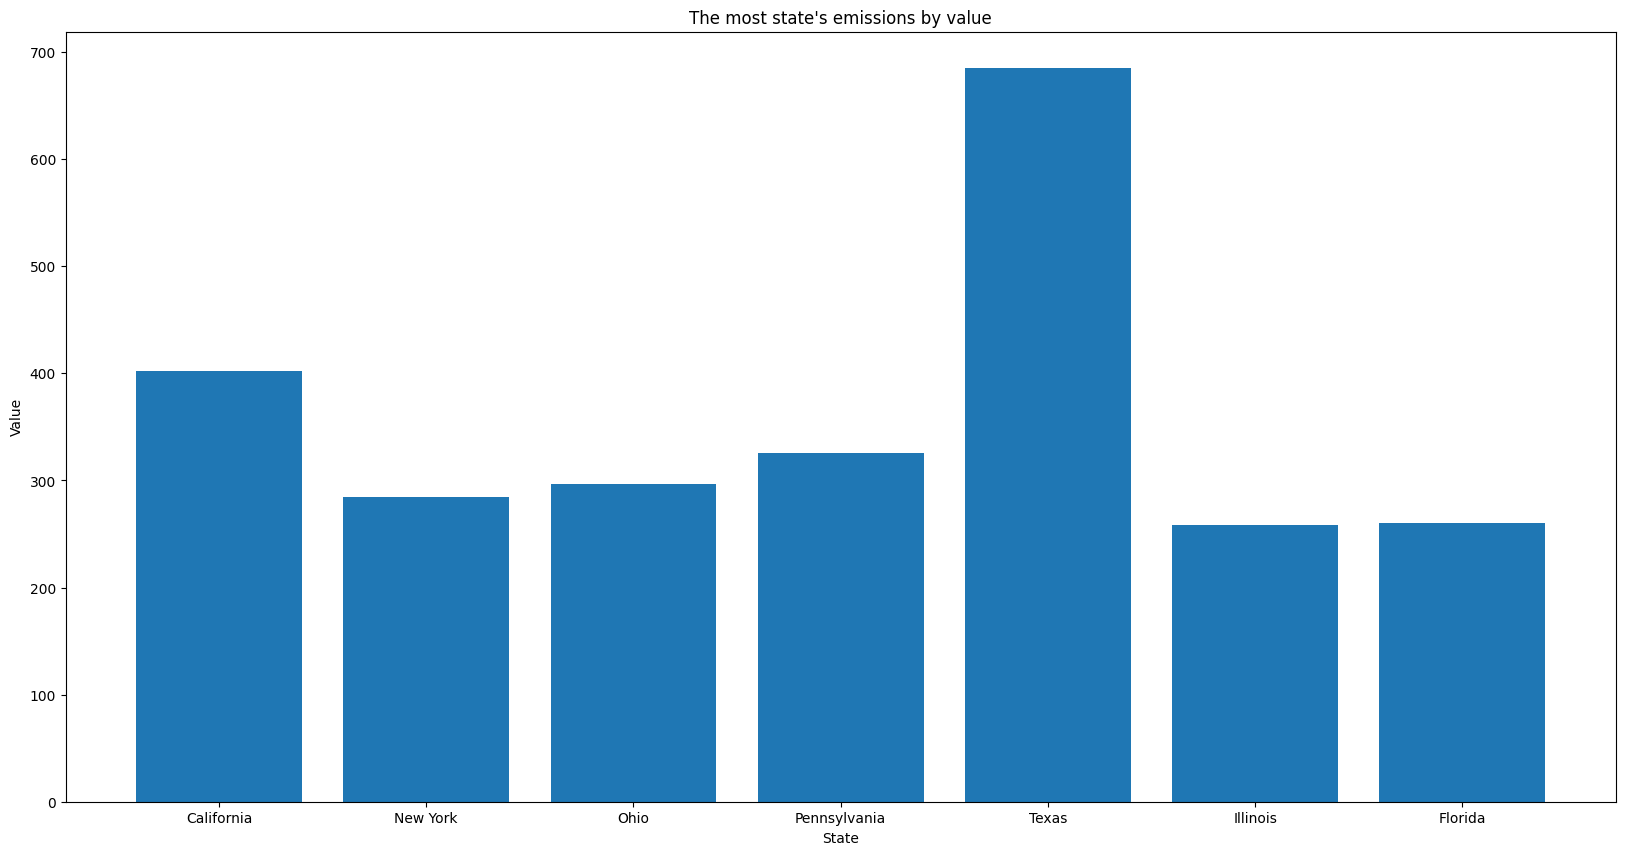

In [200]:
plt.figure(figsize=(20, 10))
plt.bar(data["state-name"], data["value"])
plt.xlabel("State")
plt.ylabel("Value")
plt.title("The most state's emissions by value")

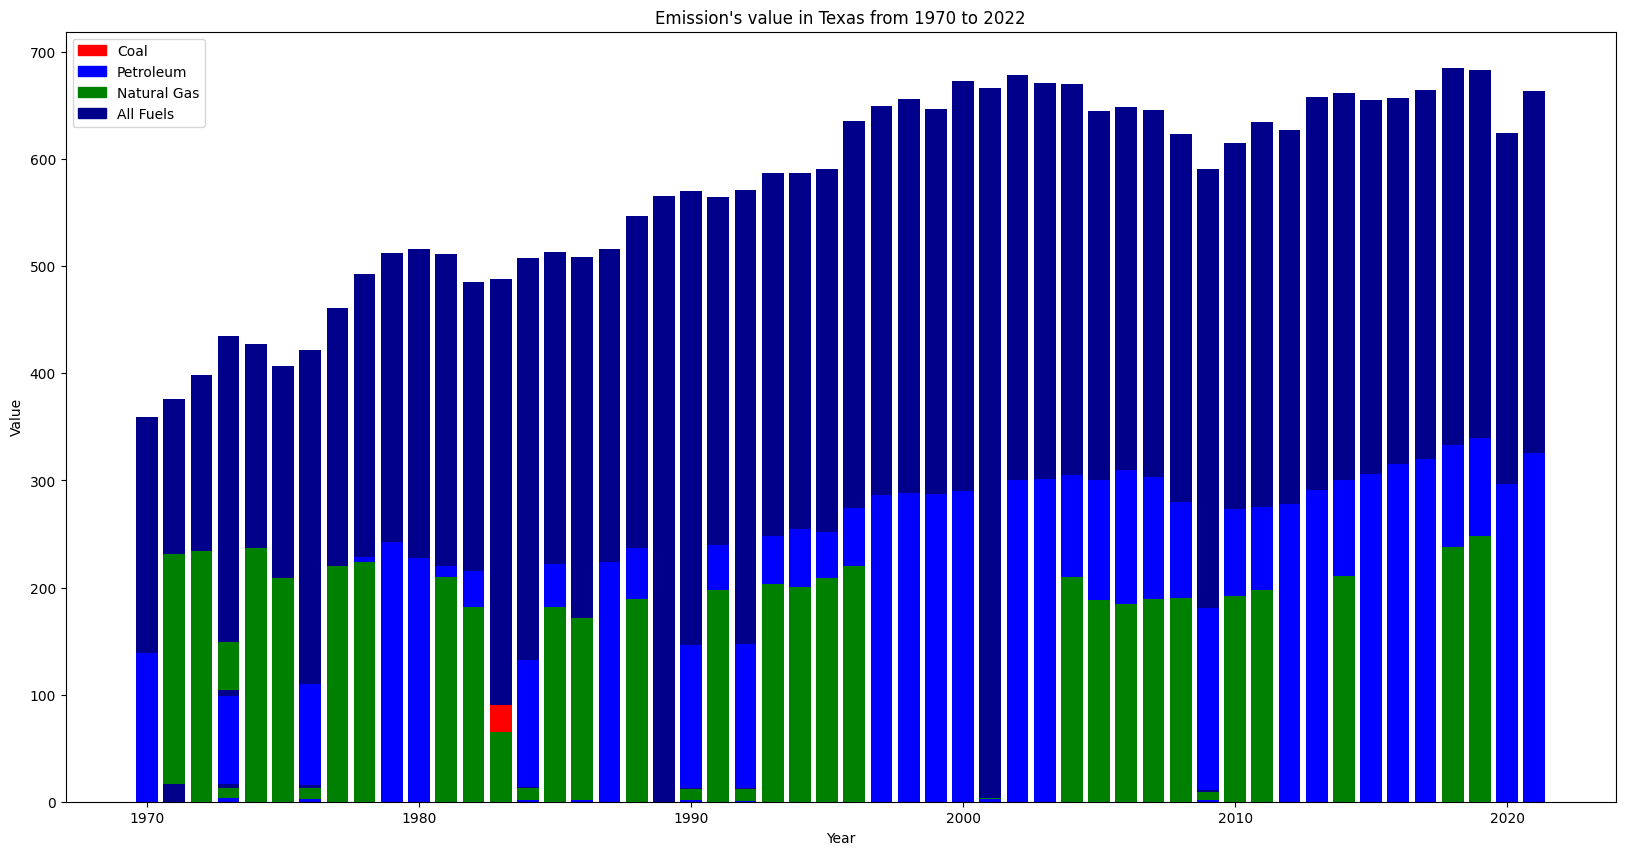

In [202]:
plt.figure(figsize=(20, 10))
ny_data = df[df["state-name"] == 'Texas']
plt.bar(ny_data["year"], ny_data["value"], color=[colors[fuel] for fuel in ny_data["fuel-name"]])
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Emission's value in Texas from 1970 to 2022")
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
plt.legend(legend_handles, colors.keys())

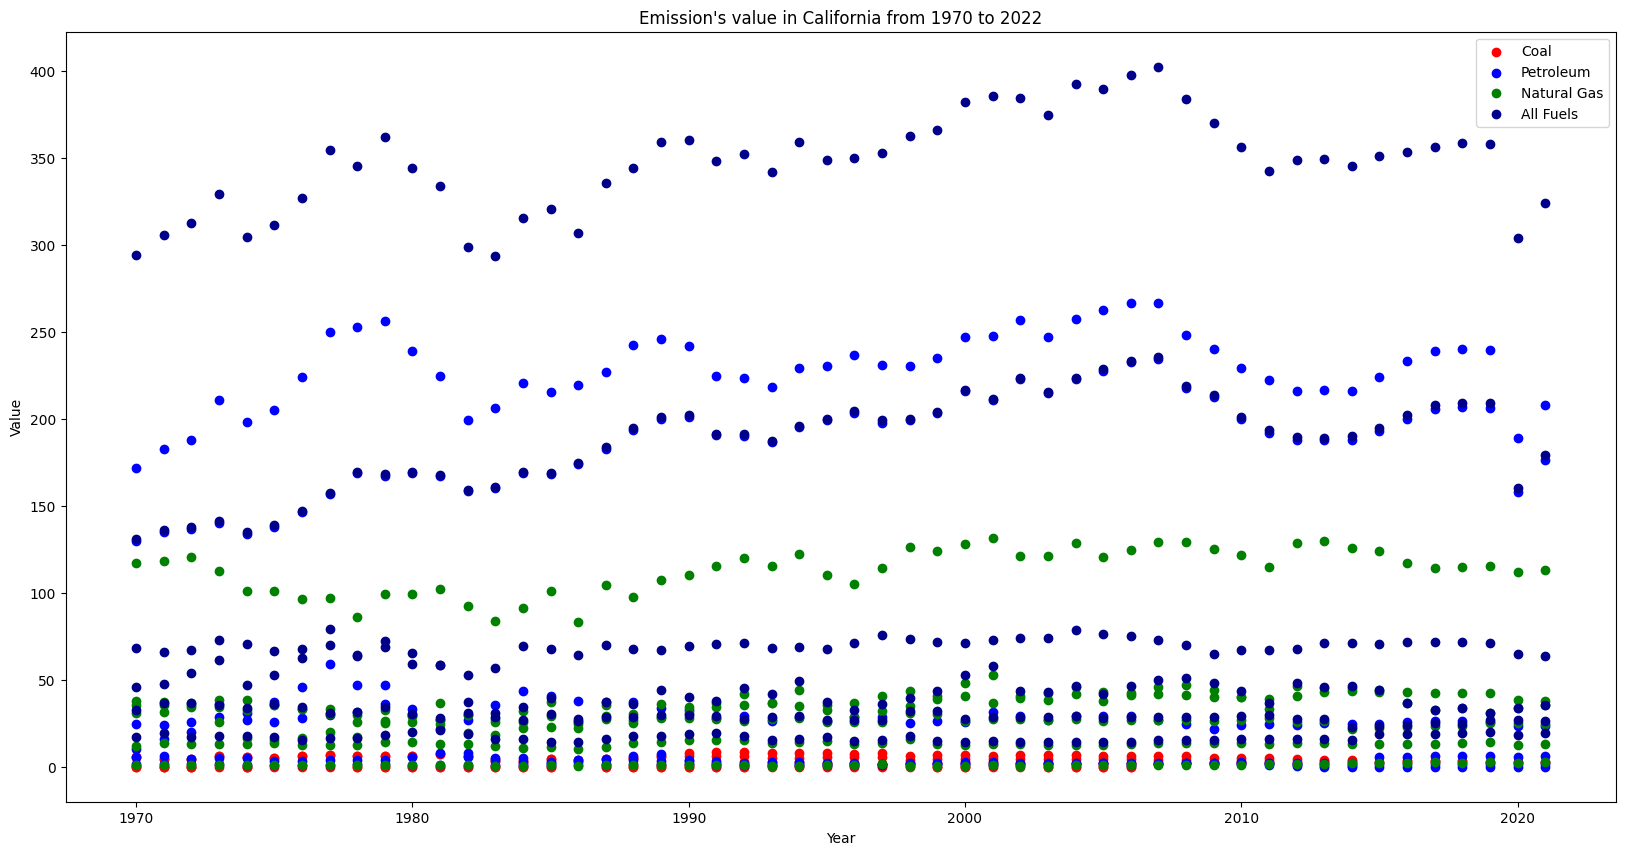

In [211]:
plt.figure(figsize=(20, 10))
california_data = df[df["state-name"] == 'California']
for fuel, color in colors.items():
    fuel_data = california_data[california_data["fuel-name"] == fuel]
    plt.scatter(fuel_data["year"], fuel_data["value"], color=color, label=fuel)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Emission's value in California from 1970 to 2022")
plt.legend()
plt.show()

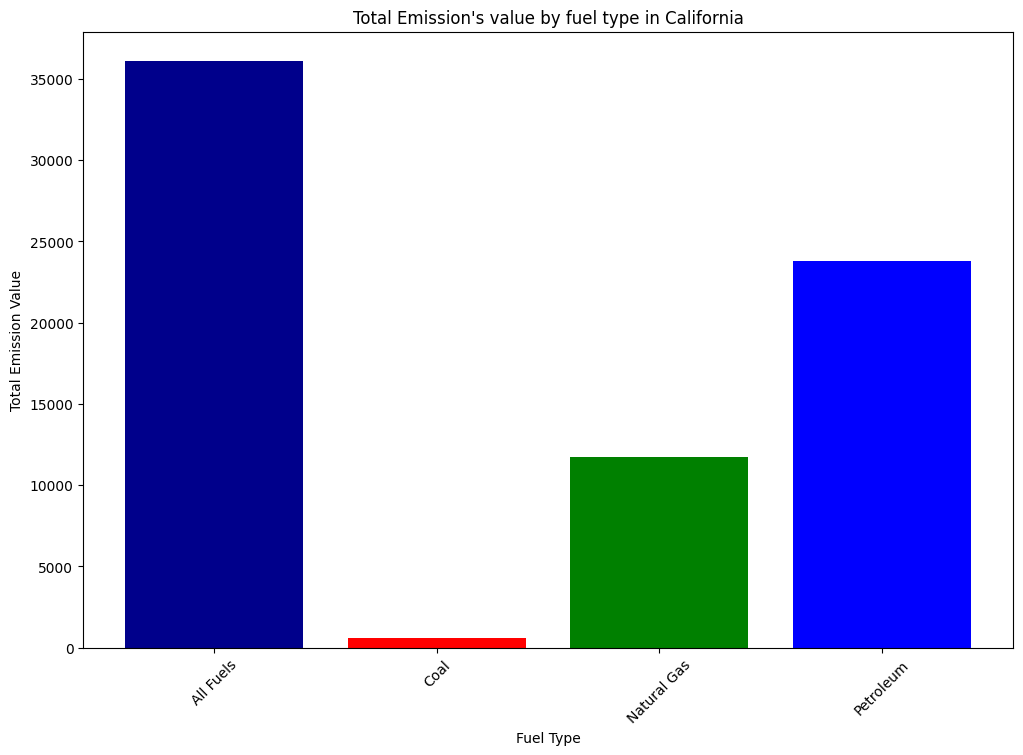

In [213]:
plt.figure(figsize=(12, 8))
california_data = df[df["state-name"] == 'California']
fuel_groups = california_data.groupby("fuel-name")["value"].sum()
bars = plt.bar(fuel_groups.index, fuel_groups.values, color=[colors[fuel] for fuel in fuel_groups.index])
plt.xlabel("Fuel Type")
plt.ylabel("Total Emission Value")
plt.title("Total Emission's value by fuel type in California")
plt.xticks(rotation=45)
plt.show()